### heart Disease Prediction using the Logistic Regression 

In [93]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
disease_df = pd.read_csv("framingham.csv")
disease_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [36]:
# checking nan values are occuraing or not

nan_counts = disease_df.isnull().sum()
print(nan_counts)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [82]:
# many rows have nan value so we have to remove it 

disease_df.dropna(axis = 0, inplace = True)
nan_counts = disease_df.isnull().sum()
print(nan_counts)  # now there are no  nan values

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [84]:
disease_df['TenYearCHD'].value_counts()

TenYearCHD
0    3101
1     557
Name: count, dtype: int64

In [85]:
X = np.asarray(disease_df[['age', 'male', 'cigsPerDay','totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# now standard scaler is important // scalling the data have a mean 0 and stand deviation 1

X = preprocessing.StandardScaler().fit(X).transform(X)
print(X)
print('------'*10)

# split the dataset into train and testing (70-30) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

[[-1.23257968  1.11975484 -0.75716891 -0.94910778 -1.19411072 -0.20304365]
 [-0.41490473 -0.89305263 -0.75716891  0.29829385 -0.51488122 -0.24488308]
 [-0.18128332  1.11975484  0.92068895  0.1848937  -0.22054843 -0.49591969]
 ...
 [ 0.28595951 -0.89305263 -0.75716891  0.72921442  0.05114337  1.05213942]
 [-1.11576897  1.11975484 -0.75716891 -1.17590808  0.39075812 -0.41224082]
 [-1.23257968 -0.89305263  1.75961789 -0.92642775  0.02850239 -0.07752534]]
------------------------------------------------------------
Train set: (2560, 6) (2560,)
Test set: (1098, 6) (1098,)


### we are doing some Exploratory Data Analysis

C:\Users\saswa\AppData\Local\Temp\ipykernel_2240\3730954570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")


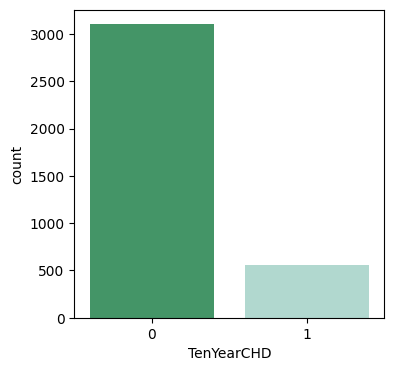

In [86]:
plt.figure(figsize=(4, 4))
sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")
plt.show()

# here some inbalance data most of the people have not heart desease (label 0)

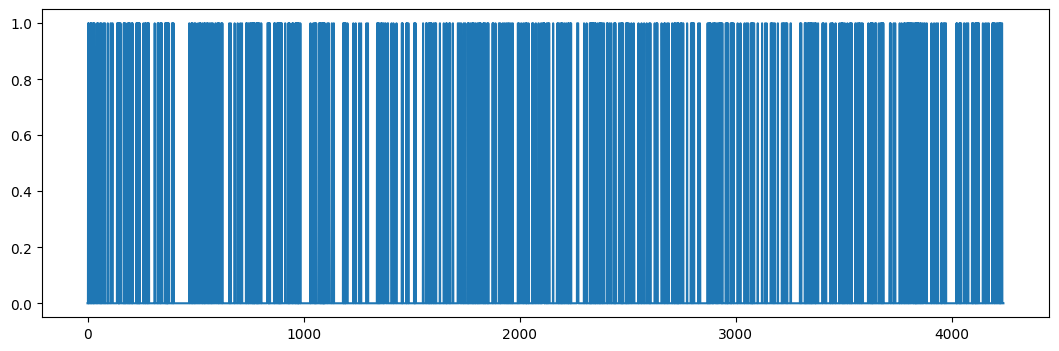

In [87]:
plt.figure(figsize=(13, 4))
least = disease_df['TenYearCHD'].plot()
plt.show(least)

# bule bars - absence of disease 
# white bars - there is having disease

In [88]:
# now train the model

MODEL = LogisticRegression()
MODEL.fit(X_train,y_train)

LogisticRegression()

In [91]:
# making predictions 

y_pred = MODEL.predict(X_test)
print(y_pred)

[0 0 0 ... 1 0 0]


In [94]:
# now checking the Accuracy

print('Accuracy of the model is =', accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.843351548269581


The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       922
           1       0.60      0.07      0.12       176

    accuracy                           0.84      1098
   macro avg       0.72      0.53      0.52      1098
weighted avg       0.81      0.84      0.79      1098



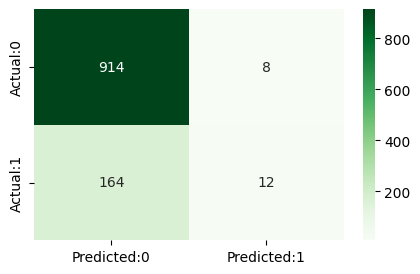

In [97]:
# printing confusion matrix

print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()